In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from utils_plot import extract_data_from_dfgen
from utils_plot import trajInspection
from utils_plot import tsne_anslysis

In [4]:
from utils_evaluation import create_df_for_cdf, sns_comparison
from utils_evaluation import create_df_for_lineplot, sns_ks
from utils_evaluation import weighted_ks_2samp

# Load Data

In [6]:
# Replace 'your_file.csv' with the actual path to your CSV file
path_raw = 'Synthetic_crash_scenarios.csv'
# path_raw = '/content/drive/MyDrive/Colab Notebooks/Thesis Crash Generation/New dataset/Synthetic_crash_scenarios.csv'
# path_gen = 'Synthetic_Crash_50.csv'
# path_gen = 'Synthetic_Crash_dtw_50_postprocessed.csv'
path_gen = 'Synthetic_Crash_dtw_02_postprocessed.csv'

# Read the CSV file into a DataFrame
df_raw = pd.read_csv(path_raw)
df_gen = pd.read_csv(path_gen)

In [7]:
## read the ID of train, val, test dataset
import pickle
# with open('.\\utils_data\\Idx_fd_50_split.pkl', 'rb') as f:
with open('.\\utils_data\\Idx_fd_02_split.pkl', 'rb') as f:
    list_train_val_test = pickle.load(f)
list_train_val_test = list_train_val_test[0]

ID_train, ID_val, ID_test = list_train_val_test[0], list_train_val_test[1], list_train_val_test[2]
ID_train, ID_val, ID_test = ID_train+1, ID_val+1, ID_test+1

In [8]:
V_l = np.zeros((5000,97))
V_f = np.zeros((5000,97))
D = np.zeros((5000,97))
Weight = np.zeros(5000)
for i in range(1,5001):
    v_l_i = df_raw[df_raw["id"]==i].iloc[-98:-1, 3].to_numpy()
    v_f_i = df_raw[df_raw["id"]==i].iloc[-98:-1, 2].to_numpy()
    d_i = df_raw[df_raw["id"]==i].iloc[-98:-1, 4].to_numpy() - df_raw[df_raw["id"]==i].iloc[-2, 4]
    weight_i = df_raw[df_raw["id"]==i].iloc[0, 6]
    V_l[i-1,:], V_f[i-1,:], D[i-1,:] = v_l_i, v_f_i, d_i
    Weight[i-1] = weight_i

import copy
V_l_raw = copy.deepcopy(V_l)
V_f_raw = copy.deepcopy(V_f)
D_raw = copy.deepcopy(D)
Weight_raw = copy.deepcopy(Weight)

# Trajectories Visualization

In [10]:
from utils_cluster import genNormalizedX

ID_eva = copy.deepcopy(ID_test)
# ID_eva = np.arange(1,5001)

V_l_gen_eva = extract_data_from_dfgen(df_gen,para = 'v_l',split_type = 'test')
V_f_gen_eva = extract_data_from_dfgen(df_gen,para = 'v_f',split_type = 'test')
D_gen_eva = extract_data_from_dfgen(df_gen,para = 'd',split_type = 'test')
Weight_gen_eva = extract_data_from_dfgen(df_gen,para = 'weight',split_type = 'test')
ReWeight_gen_eva = extract_data_from_dfgen(df_gen,para = 'reweight',split_type = 'test')
y_gen_eva = extract_data_from_dfgen(df_gen,para = 'label',split_type = 'test')
idxcut_gen_eva = extract_data_from_dfgen(df_gen,para = 'qualify',split_type = 'test')

X_raw_eva = genNormalizedX(V_l_raw[ID_eva-1],V_f_raw[ID_eva-1],D_raw[ID_eva-1])
X_gen_eva = genNormalizedX(V_l_gen_eva,V_f_gen_eva,D_gen_eva)

# X_gen_eva = X_gen_eva[:int(X_gen_eva.shape[0]/15*3)]
# Weight_gen_eva = Weight_gen_eva[:int(Weight_gen_eva.shape[0]/15*3)]

In [11]:
# y_gen_eva = np.load(".\\utils_data\\hc_fddtw_y_50.npy")
# y_gen_eva_filter = y_gen_eva[1]
# y_gen_eva = y_gen_eva[0]
y_raw = np.load('.\\utils_data\\hc_fd_y.npy')
y_raw_eva = y_raw[ID_eva-1]

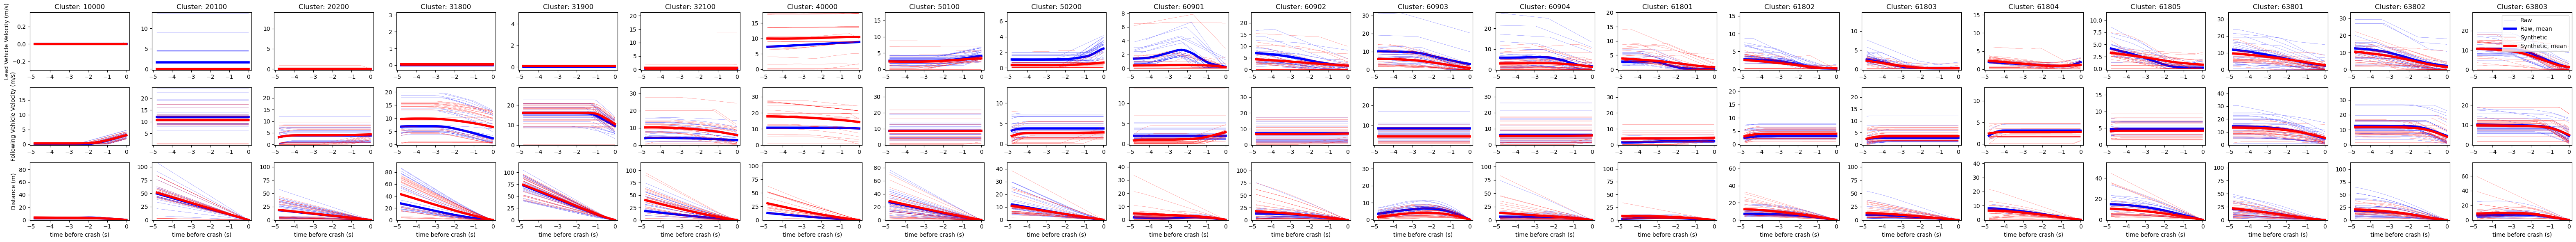

In [12]:
trajInspection(
    X_raw_eva,X_gen_eva,
    y_raw_eva,y_gen_eva,
    Weight_raw[ID_eva-1],Weight_gen_eva,
    traj_number = 25,
    line_transparency = 1,
)

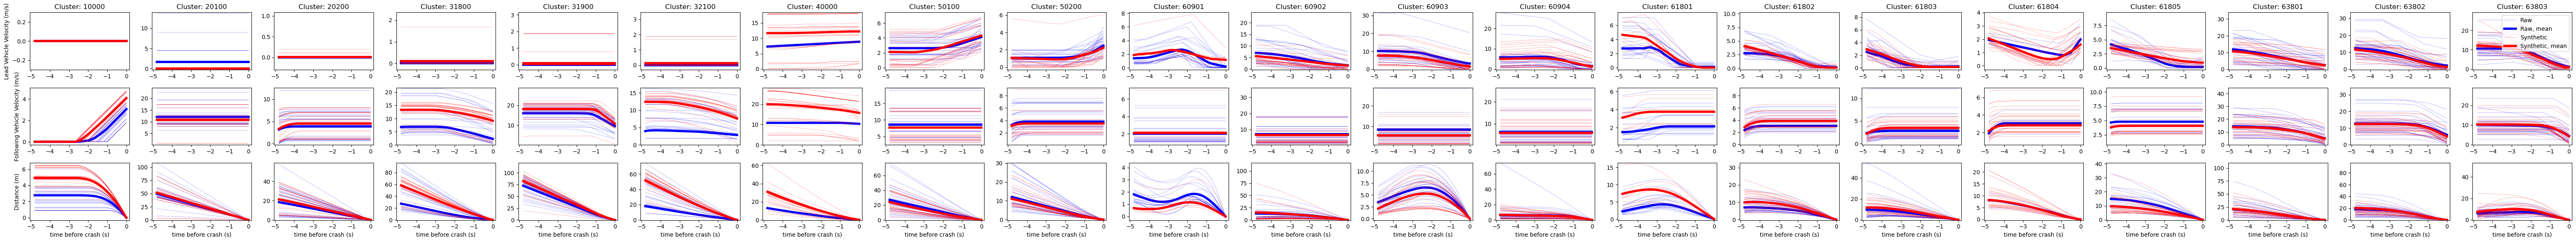

In [13]:
trajInspection(
    X_raw_eva,X_gen_eva[idxcut_gen_eva],
    y_raw_eva,y_gen_eva[idxcut_gen_eva],
    Weight_raw[ID_eva-1],ReWeight_gen_eva[idxcut_gen_eva],
    traj_number = 25,
    line_transparency = 1,
)

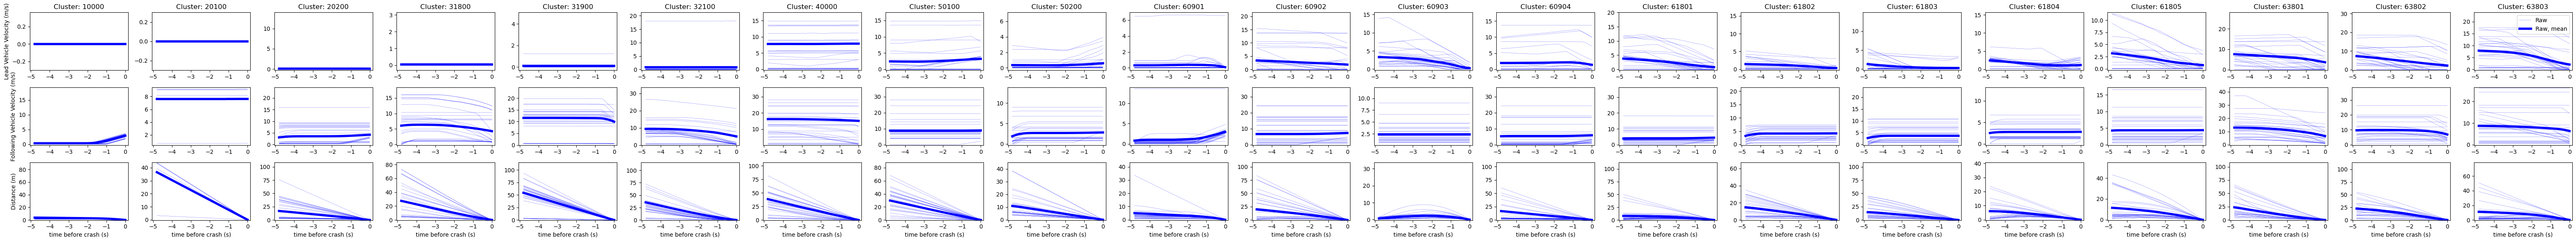

In [14]:
from utils_plot import clsInspection
clsInspection(
    X_gen_eva[~idxcut_gen_eva],
    y_gen_eva[~idxcut_gen_eva],
    Weight_gen_eva[~idxcut_gen_eva],
    traj_number = 25,
    line_transparency = 1,
)

In [15]:
# [:y_gen_eva.shape[0]][y_gen_eva_filter!=-1]

# T-SNE plot

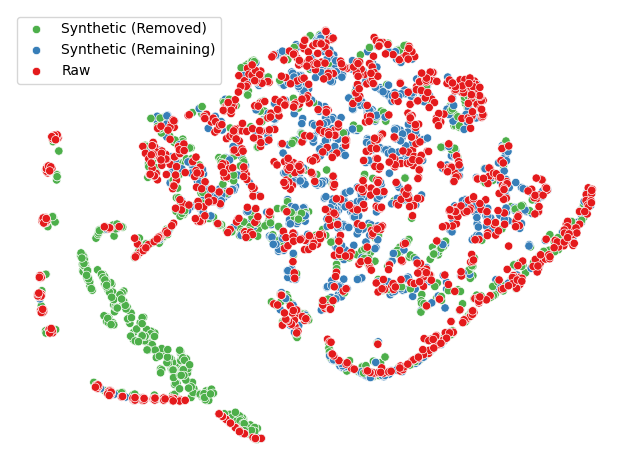

,y,comp-1,comp-2,weights
0,Synthetic (Removed),-26.686882,13.945514,1
1,Synthetic (Removed),63.110142,8.505369,1
2,Synthetic (Removed),68.749710,-4.220614,1
3,Synthetic (Removed),-9.434343,-21.181841,1
4,Synthetic (Remaining),-33.091560,2.335445,1
...,...,...,...,...
3398,Raw,-3.609661,28.190714,1
3399,Raw,28.931107,13.185158,1
3400,Raw,-15.386757,20.555412,1
3401,Raw,-8.361820,26.742189,1


In [9]:
tsne_anslysis(X_raw_eva[:,:,0],X_gen_eva[::9,:,0],idxcut_gen_eva[::9])

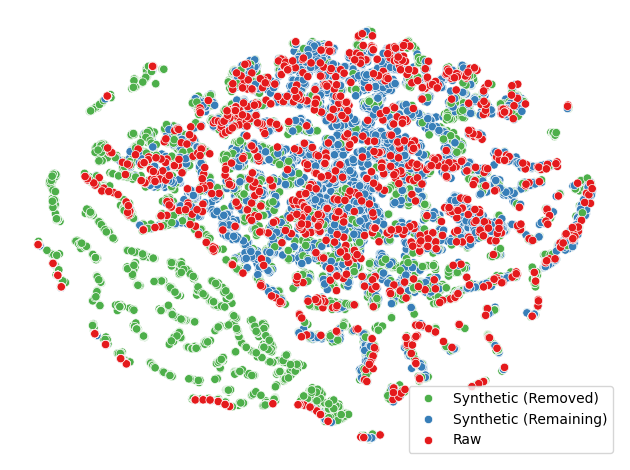

,y,comp-1,comp-2,weights
0,Synthetic (Removed),-45.604847,27.599075,1
1,Synthetic (Remaining),-6.767021,-35.307171,1
2,Synthetic (Removed),92.586250,15.186955,1
3,Synthetic (Removed),-97.109909,28.967844,1
4,Synthetic (Remaining),87.396866,3.379390,1
...,...,...,...,...
20411,Raw,-12.483639,60.315018,1
20412,Raw,48.080986,24.219021,1
20413,Raw,-29.738016,46.766472,1
20414,Raw,-13.112753,63.905346,1


In [8]:
tsne_anslysis(X_raw_eva[:,:,0],X_gen_eva[:,:,0],idxcut_gen_eva)

# Distribution Evaluation

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


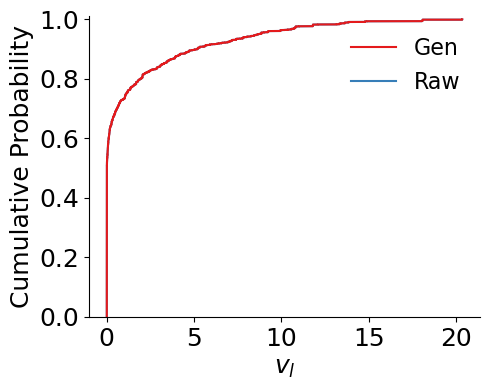

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


p_value on t = 0s is 1.0


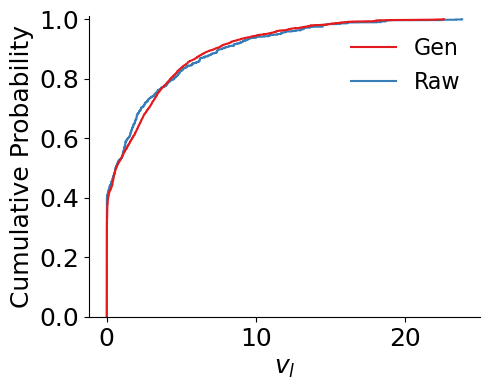

p_value on t = 1s is 7.694739269215045e-05


C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


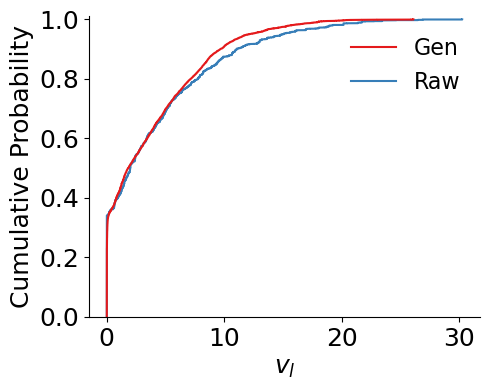

p_value on t = 2s is 6.114827693859404e-06


C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


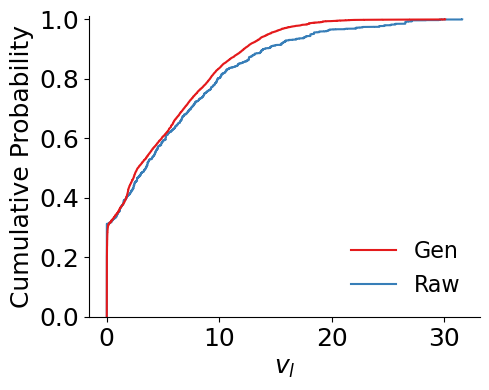

p_value on t = 3s is 1.1285244605363509e-05


C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


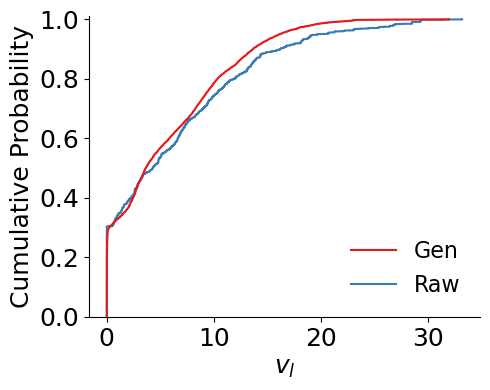

p_value on t = 4s is 2.2039915149596467e-06


In [54]:
import copy
para = "v_l"
ID_eva = copy.deepcopy(ID_test)

## read the data
if para in ["v_l","v_f","d"]:
    Para_gen_eva = extract_data_from_dfgen(df_gen,para=para,split_type='test')
# elif para == "v_l_dt"
Weight_gen_eva = extract_data_from_dfgen(df_gen,para='weight',split_type='test')

if para == "v_l":
    Para_raw_eva = V_l_raw[ID_eva-1]
elif para == "v_f":
    Para_raw_eva = V_f_raw[ID_eva-1]
elif para == "d":
    Para_raw_eva = D_raw[ID_eva-1]
Weight_raw_eva = Weight_raw[ID_eva-1]

## plotting
for t in range(5):
    df_plot = create_df_for_cdf(
        [Para_gen_eva[:,-1-20*t],Para_raw_eva[:,-1-20*t]],
        ["Gen","Raw"],
        [Weight_gen_eva,Weight_raw_eva],
    )

    plt.figure(figsize=(5,4))
    sns_comparison(
        data = df_plot,
        x = "Data",
        weights = "Weight",
        hue = "Label",
        type='ecdf',
        # legend_off = True,
        xlabel=f"${para}$",
        ylabel="Cumulative Probability",
        xaxis_off=True,
        yaxis_off=True,
        # xticks_off=True,
        # yticks_off=True,
        ylim=[0,1.01],
    )
    plt.show()

    _, p_value = weighted_ks_2samp(
        Para_gen_eva[:,-1-20*t],Para_raw_eva[:,-1-20*t],
        Weight_gen_eva,Weight_raw_eva
    )
    print(f"p_value on t = {t}s is {p_value}")

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


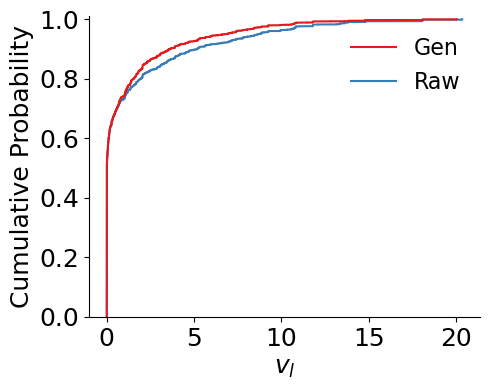

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


p_value on t = 0s is 0.5054032214132846


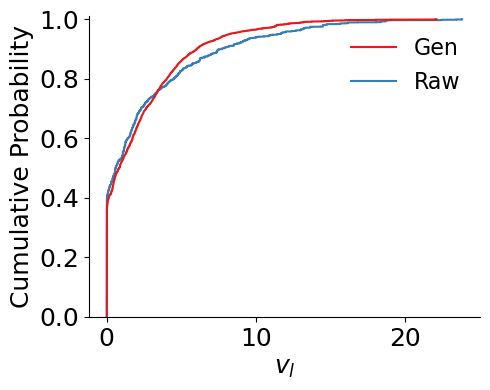

p_value on t = 1s is 0.27065927373413945


C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


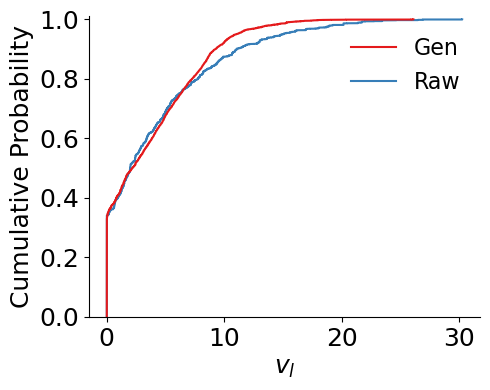

p_value on t = 2s is 0.06987914064294076


C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


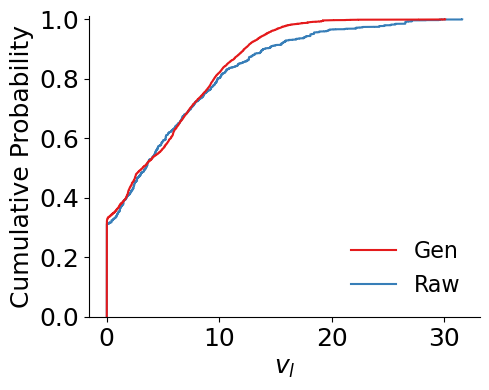

p_value on t = 3s is 0.10728795136392999


C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


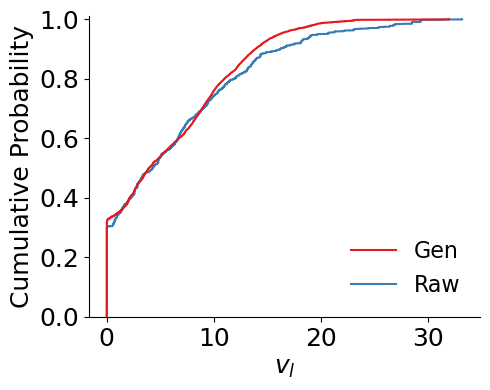

p_value on t = 4s is 0.18581629573683411


In [56]:
import copy
para = "v_l"
ID_eva = copy.deepcopy(ID_test)

## read the data
if para in ["v_l","v_f","d"]:
    Para_gen_eva = extract_data_from_dfgen(df_gen,para=para,split_type='test',nofilter=False)
# elif para == "v_l_dt"
Weight_gen_eva = extract_data_from_dfgen(df_gen,para='reweight',split_type='test',nofilter=False)

if para == "v_l":
    Para_raw_eva = V_l_raw[ID_eva-1]
elif para == "v_f":
    Para_raw_eva = V_f_raw[ID_eva-1]
elif para == "d":
    Para_raw_eva = D_raw[ID_eva-1]
Weight_raw_eva = Weight_raw[ID_eva-1]

## plotting
for t in range(5):
    df_plot = create_df_for_cdf(
        [Para_gen_eva[:,-1-20*t],Para_raw_eva[:,-1-20*t]],
        ["Gen","Raw"],
        [Weight_gen_eva,Weight_raw_eva],
    )

    plt.figure(figsize=(5,4))
    sns_comparison(
        data = df_plot,
        x = "Data",
        weights = "Weight",
        hue = "Label",
        type='ecdf',
        # legend_off = True,
        xlabel=f"${para}$",
        ylabel="Cumulative Probability",
        xaxis_off=True,
        yaxis_off=True,
        # xticks_off=True,
        # yticks_off=True,
        ylim=[0,1.01],
    )
    plt.show()

    _, p_value = weighted_ks_2samp(
        Para_gen_eva[:,-1-20*t],Para_raw_eva[:,-1-20*t],
        Weight_gen_eva,Weight_raw_eva
    )
    print(f"p_value on t = {t}s is {p_value}")

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


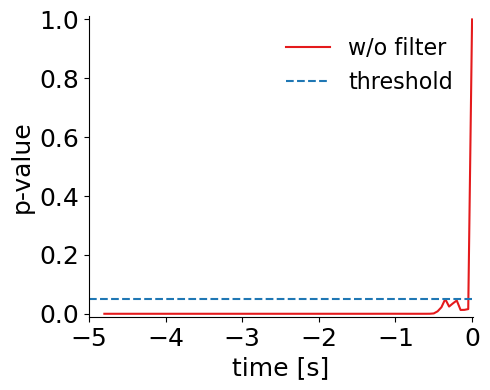

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


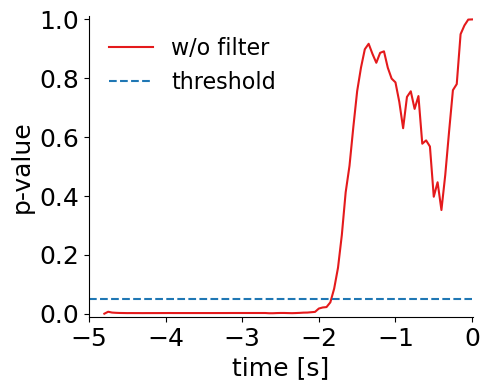

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


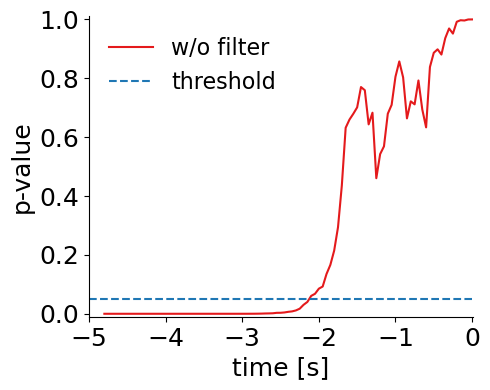

In [17]:
import copy
ID_eva = copy.deepcopy(ID_test)

for para in ["v_l","v_f","d"]:

    ## read the data
    if para in ["v_l","v_f","d"]:
        Para_gen_eva = extract_data_from_dfgen(df_gen,para=para,split_type='test')
    # elif para == "v_l_dt"
    Weight_gen_eva = extract_data_from_dfgen(df_gen,para='weight',split_type='test')
    
    if para == "v_l":
        Para_raw_eva = V_l_raw[ID_eva-1]
    elif para == "v_f":
        Para_raw_eva = V_f_raw[ID_eva-1]
    elif para == "d":
        Para_raw_eva = D_raw[ID_eva-1]
    Weight_raw_eva = Weight_raw[ID_eva-1]

    ## Calculate the p-value
    P_value = []
    for t in range(-1,-98,-1):
        
        _, p_value = weighted_ks_2samp(
            Para_gen_eva[:,t],Para_raw_eva[:,t],
            Weight_gen_eva,Weight_raw_eva
        )
        P_value.append(p_value)
    P_value = np.array(P_value)

    ## Plotting
    df_plot = create_df_for_lineplot(
        [P_value],
        ['w/o filter']
    )
    
    plt.figure(figsize=(5,4))
    sns_ks(data = df_plot,
           # legend_off = True,
           xlabel="time [s]",
           ylabel="p-value",
           xlim=[-5,0.01],
           ylim=[-0.01,1.01],
           # labels = {'w/o filter':'w/o filter'},
           xaxis_off=True,
           yaxis_off=True,
           # xticks_off=True,
           # yticks_off=True,
    )
    plt.show()

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


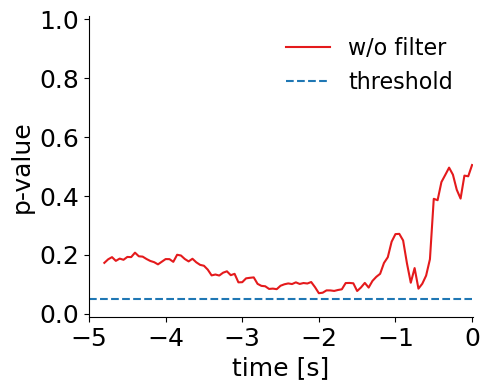

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


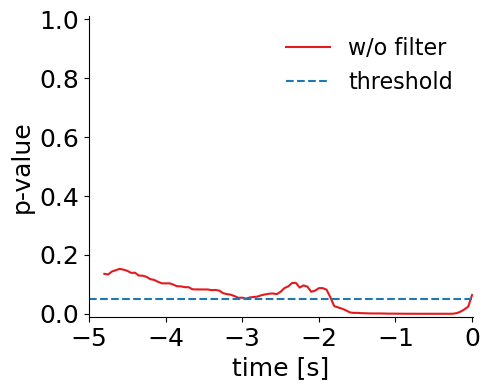

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


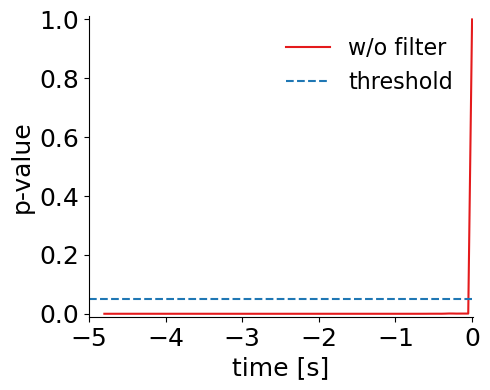

In [18]:
import copy
ID_eva = copy.deepcopy(ID_test)

for para in ["v_l","v_f","d"]:

    ## read the data
    if para in ["v_l","v_f","d"]:
        Para_gen_eva = extract_data_from_dfgen(df_gen,para=para,split_type='test',nofilter=False)
    # elif para == "v_l_dt"
    Weight_gen_eva = extract_data_from_dfgen(df_gen,para='reweight',split_type='test',nofilter=False)
    
    if para == "v_l":
        Para_raw_eva = V_l_raw[ID_eva-1]
    elif para == "v_f":
        Para_raw_eva = V_f_raw[ID_eva-1]
    elif para == "d":
        Para_raw_eva = D_raw[ID_eva-1]
    Weight_raw_eva = Weight_raw[ID_eva-1]

    ## Calculate the p-value
    P_value = []
    for t in range(-1,-98,-1):
        
        _, p_value = weighted_ks_2samp(
            Para_gen_eva[:,t],Para_raw_eva[:,t],
            Weight_gen_eva,Weight_raw_eva
        )
        P_value.append(p_value)
    P_value = np.array(P_value)

    ## Plotting
    df_plot = create_df_for_lineplot(
        [P_value],
        ['w/o filter']
    )
    
    plt.figure(figsize=(5,4))
    sns_ks(data = df_plot,
           # legend_off = True,
           xlabel="time [s]",
           ylabel="p-value",
           xlim=[-5,0.01],
           ylim=[-0.01,1.01],
           # labels = {'w/o filter':'w/o filter'},
           xaxis_off=True,
           yaxis_off=True,
           # xticks_off=True,
           # yticks_off=True,
    )
    plt.show()

In [44]:
import copy
ID_eva = copy.deepcopy(ID_test)

List_P = []
for para in ["v_l","v_f","d"]:

    ## read the data
    if para in ["v_l","v_f","d"]:
        Para_gen_eva = extract_data_from_dfgen(df_gen,para=para,split_type='test')
    # elif para == "v_l_dt"
    Weight_gen_eva = extract_data_from_dfgen(df_gen,para='reweight',split_type='test')
    
    if para == "v_l":
        Para_raw_eva = V_l_raw[ID_eva-1]
    elif para == "v_f":
        Para_raw_eva = V_f_raw[ID_eva-1]
    elif para == "d":
        Para_raw_eva = D_raw[ID_eva-1]
    Weight_raw_eva = Weight_raw[ID_eva-1]

    ## Calculate the p-value
    P_value = []
    for t in range(-1,-98,-1):
        
        _, p_value = weighted_ks_2samp(
            Para_gen_eva[:,t],Para_raw_eva[:,t],
            Weight_gen_eva,Weight_raw_eva
        )
        P_value.append(p_value)
    P_value = np.array(P_value)
    List_P.append(P_value)

In [45]:
time_series_list = [list_P>0.05 for list_P in List_P]

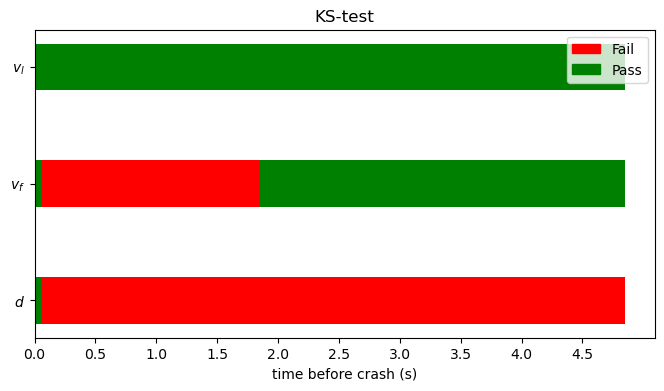

In [86]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# # Example time series data containing only 0 and 1
# time_series_1 = [0, 1, 0, 1, 1, 0, 0, 1, 0, 1]
# time_series_2 = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]
# time_series_3 = [0, 0, 1, 1, 0, 0, 1, 1, 0, 0]
# time_series_4 = [1, 1, 0, 0, 1, 1, 0, 0, 1, 1]

# # Combine the time series into a list
# time_series_list = [time_series_1, time_series_2, time_series_3, time_series_4]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 4))

# Plot each time series
for idx, time_series in enumerate(reversed(time_series_list)):
    colors = ['red' if value == 0 else 'green' for value in time_series]
    for i, value in enumerate(time_series):
        ax.barh(idx, 1, left=i, height=0.4, color=colors[i])

# Set the y-ticks and labels to represent the time series
ax.set_yticks(np.arange(len(time_series_list)))
# ax.set_yticklabels([f'Series {i+1}' for i in range(len(time_series_list))])
ax.set_yticklabels(reversed(["$v_l$","$v_f$","$d$"]))

# Label the x-axis
ax.set_xlabel('time before crash (s)')

# # Set the x-ticks to show the time points
# ax.set_xticks(np.arange(0,len(time_series_list[0])*0.05,0.05) + 0.5)
# ax.set_xticklabels(np.arange(0,len(time_series_list[0])*0.05,0.05))
x_ticks = np.arange(0, len(time_series_list[0]) * 0.05, 0.5)
ax.set_xticks(x_ticks / 0.05)
ax.set_xticklabels([f'{tick:.1f}' for tick in x_ticks])

# Add a title to the plot
plt.title('KS-test')

# Create legend
red_patch = mpatches.Patch(color='red', label='Fail')
green_patch = mpatches.Patch(color='green', label='Pass')
# plt.legend(handles=[red_patch, green_patch], title='Values')
plt.legend(handles=[red_patch, green_patch])

# Display the plot
plt.show()
